In [ ]:
 import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras import activations

In [ ]:
label = pd.read_csv("/content/drive/MyDrive/data1/label_names.csv")
label

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
ClassId=list(label['SignName'])

In [ ]:
train = pd.read_pickle("/content/drive/MyDrive/data1/train.pickle")
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
train["features"].shape

(34799, 32, 32, 3)

In [ ]:
trainx = train['features']

In [ ]:
labels = train['labels']
labels.shape

(34799,)

In [ ]:
trainy = labels

In [ ]:
features = train['features']

In [ ]:
'''trainy = to_categorical(trainy)
trainy'''

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

برای سیاه و سفید کردن و تغییر نور از این تکنیک استفاده میکنیم.

In [ ]:
'''import cv2
trainx = trainx.astype('float32')
temp = []
for i in trainx:
  gray = cv2.cvtColor(i , cv2.COLOR_RGB2GRAY)
  eq = cv2.equalizeHist(np.uint8(gray))
  temp.append(eq.reshape(32,32,1))
  
trainx = np.array(temp)  

trainx = trainx / 255.0'''

In [ ]:
test = pd.read_pickle("/content/drive/MyDrive/data1/test.pickle")
test

{'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ...,
          [115, 137, 169],
          [116, 136, 168],
          [118, 139, 172]],
 
         [[116, 136, 166],
          [114, 134, 168],
     

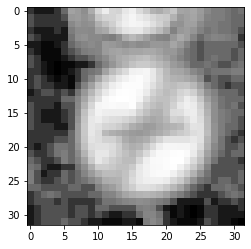

In [ ]:
#plt.imshow(trainx[0].reshape(32,32),cmap = 'gray')

In [ ]:
trainx
trainx.shape

(34799, 32, 32, 3)

متوازن بودن کلاس ها : به ازای هر تابلو تعداد را محاسبه میکند

In [ ]:
label_enum=[]
for i in range(43):
    label_enum.append(0)
    for j in range(len(trainy)):
        if(i == trainy[j]):
            label_enum[i]+=1
for i in range(43):
    print(label_enum[i])
print("min is :",min(label_enum))
print("max is  :",max(label_enum))

180
1980
2010
1260
1770
1650
360
1290
1260
1320
1800
1170
1890
1920
690
540
360
990
1080
180
300
270
330
450
240
1350
540
210
480
240
390
690
210
599
360
1080
330
180
1860
270
300
210
210
min is : 180
max is  : 2010


مینیمم راا حساب میکند

In [ ]:
mean = len(trainy)//43
mean

809

دیکشنری میسازه

In [ ]:

train_dict = {}
for i in range(len(label)):
    train_dict[str(i)] = []

for index, img in enumerate(trainx):
    train_dict[str(trainy[index])].append(img)    

In [ ]:
for name , images in train_dict.items():
  l = len(images)
  l1 = l
  while l1<809:
    train_dict[name] = np.concatenate((train_dict[name], images), axis=0)
    l1+=l
  np.random.shuffle(train_dict[name])
  train_dict[name] = np.array(train_dict[name][:809])
for name, images in train_dict.items():
  print('class', name, 'have', len(images), 'images with shape', images.shape)

class 0 have 809 images with shape (809, 32, 32, 3)
class 1 have 809 images with shape (809, 32, 32, 3)
class 2 have 809 images with shape (809, 32, 32, 3)
class 3 have 809 images with shape (809, 32, 32, 3)
class 4 have 809 images with shape (809, 32, 32, 3)
class 5 have 809 images with shape (809, 32, 32, 3)
class 6 have 809 images with shape (809, 32, 32, 3)
class 7 have 809 images with shape (809, 32, 32, 3)
class 8 have 809 images with shape (809, 32, 32, 3)
class 9 have 809 images with shape (809, 32, 32, 3)
class 10 have 809 images with shape (809, 32, 32, 3)
class 11 have 809 images with shape (809, 32, 32, 3)
class 12 have 809 images with shape (809, 32, 32, 3)
class 13 have 809 images with shape (809, 32, 32, 3)
class 14 have 809 images with shape (809, 32, 32, 3)
class 15 have 809 images with shape (809, 32, 32, 3)
class 16 have 809 images with shape (809, 32, 32, 3)
class 17 have 809 images with shape (809, 32, 32, 3)
class 18 have 809 images with shape (809, 32, 32, 3)
cla

In [ ]:
trainX = []
trainY = []
for name, images in train_dict.items():
  trainX = trainX + images.tolist()
  trainY = trainY + [float(name) for i in range(809)]

trainX = np.array(trainX)
trainY = np.array(trainY)

print(trainX.shape)
print(trainY.shape)

(34787, 32, 32, 3)
(34787,)


In [ ]:
trainX = trainX.astype('float32')

trainX = trainX / 255.0

In [ ]:
trainY = to_categorical(trainY)

In [ ]:
valid = pd.read_pickle("/content/drive/MyDrive/data1/valid.pickle")
valid

{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8), 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 15],
          [18, 16, 16],
          ...,
          [12, 11, 1

In [ ]:
validx = valid['features']

In [ ]:
valid_labels = valid['labels']
validy = valid_labels
validy = to_categorical(validy)
validy

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
'''validx = validx.astype('float32')
temp = []
for i in validx:
  gray = cv2.cvtColor(i , cv2.COLOR_RGB2GRAY)
  eq = cv2.equalizeHist(np.uint8(gray))
  temp.append(eq.reshape(32,32,1))
  
validx = np.array(temp)  
validx = validx / 255.0
validx'''

array([[[[0.22745098],
         [0.09019608],
         [0.09019608],
         ...,
         [0.22745098],
         [0.22745098],
         [0.09019608]],

        [[0.22745098],
         [0.09019608],
         [0.22745098],
         ...,
         [0.22745098],
         [0.22745098],
         [0.09019608]],

        [[0.22745098],
         [0.09019608],
         [0.22745098],
         ...,
         [0.22745098],
         [0.22745098],
         [0.09019608]],

        ...,

        [[0.53333333],
         [0.49019608],
         [0.53333333],
         ...,
         [0.22745098],
         [0.39607843],
         [0.39607843]],

        [[0.55294118],
         [0.53333333],
         [0.55294118],
         ...,
         [0.09019608],
         [0.22745098],
         [0.39607843]],

        [[0.56862745],
         [0.55294118],
         [0.56862745],
         ...,
         [0.22745098],
         [0.39607843],
         [0.49019608]]],


       [[[0.25490196],
         [0.25490196],
         [0.25

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
batch_size = 128
image_data = datagen.flow(trainX,
                             y=trainY,
                            batch_size = batch_size)

for i,(images,labels) in enumerate(image_data):
  print(i)
  if i == 0:
    print(images.shape)
    break

0
(128, 32, 32, 3)


0
(1, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)


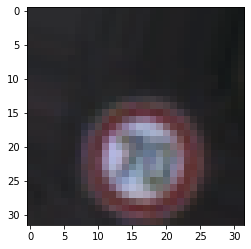

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
batch_size = 1
image_data = datagen.flow(trainX,
                            batch_size = batch_size)

for i,(images) in enumerate(image_data):
  print(i)
  if i == 0:
    print(images.shape)
    img = images[0]
    print(img.shape)
    img = img.reshape(32,32,3)
    #img = img.reshape(32,32)
    print(img.shape)
    plt.imshow(img)
    break

0
(1, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)
label : [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


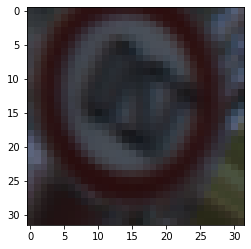

In [ ]:
batch_size = 1
image_data = datagen.flow(trainX,
                             y=trainY,
                            batch_size = batch_size)

for i,(images,labels) in enumerate(image_data):
  print(i)
  if i == 0:
    print(images.shape)
    img = images[0]
    print(img.shape)
    img = img.reshape(32,32,3)
    #img = img.reshape(32,32)
    print(img.shape)
    plt.imshow(img)
    print('label : {}'.format(labels))
    break

In [ ]:
batch_size = 256
Train = datagen.flow(trainX,
                             y=trainY,
                            batch_size = batch_size)

Valid= datagen.flow(validx,
                             y=validy,
                            batch_size = batch_size)
                          

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainY, validation_data=(validx, validy), epochs=10, batch_size=16)

Epoch 1/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.1071 - accuracy: 0.1669 - val_loss: 2.3149 - val_accuracy: 0.3939
Epoch 2/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0435 - accuracy: 0.6758 - val_loss: 1.8502 - val_accuracy: 0.7728
Epoch 3/10
2175/2175 [==============================] - 9s 4ms/step - loss: 0.0233 - accuracy: 0.8559 - val_loss: 2.6119 - val_accuracy: 0.8102
Epoch 4/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0165 - accuracy: 0.9098 - val_loss: 1.5306 - val_accuracy: 0.8814
Epoch 5/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0134 - accuracy: 0.9357 - val_loss: 1.0550 - val_accuracy: 0.9068
Epoch 6/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0119 - accuracy: 0.9442 - val_loss: 1.2792 - val_accuracy: 0.9209
Epoch 7/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0107 - accuracy: 0.9504 - val_loss: 1.7717 - val_accuracy:

In [ ]:
testx = test['features']
testy = test['labels']

In [ ]:
'''import cv2
testx = testx.astype('float32')
temp = []
for i in testx:
  gray = cv2.cvtColor(i , cv2.COLOR_RGB2GRAY)
  eq = cv2.equalizeHist(np.uint8(gray))
  temp.append(eq.reshape(32,32,1))
  
testx = np.array(temp)  

testx = testx / 255.0'''

In [ ]:
predicty = model.predict(testx)
predicty = np.argmax(predicty,axis=1)
predicty

array([16,  1, 38, ..., 13,  7,  0])

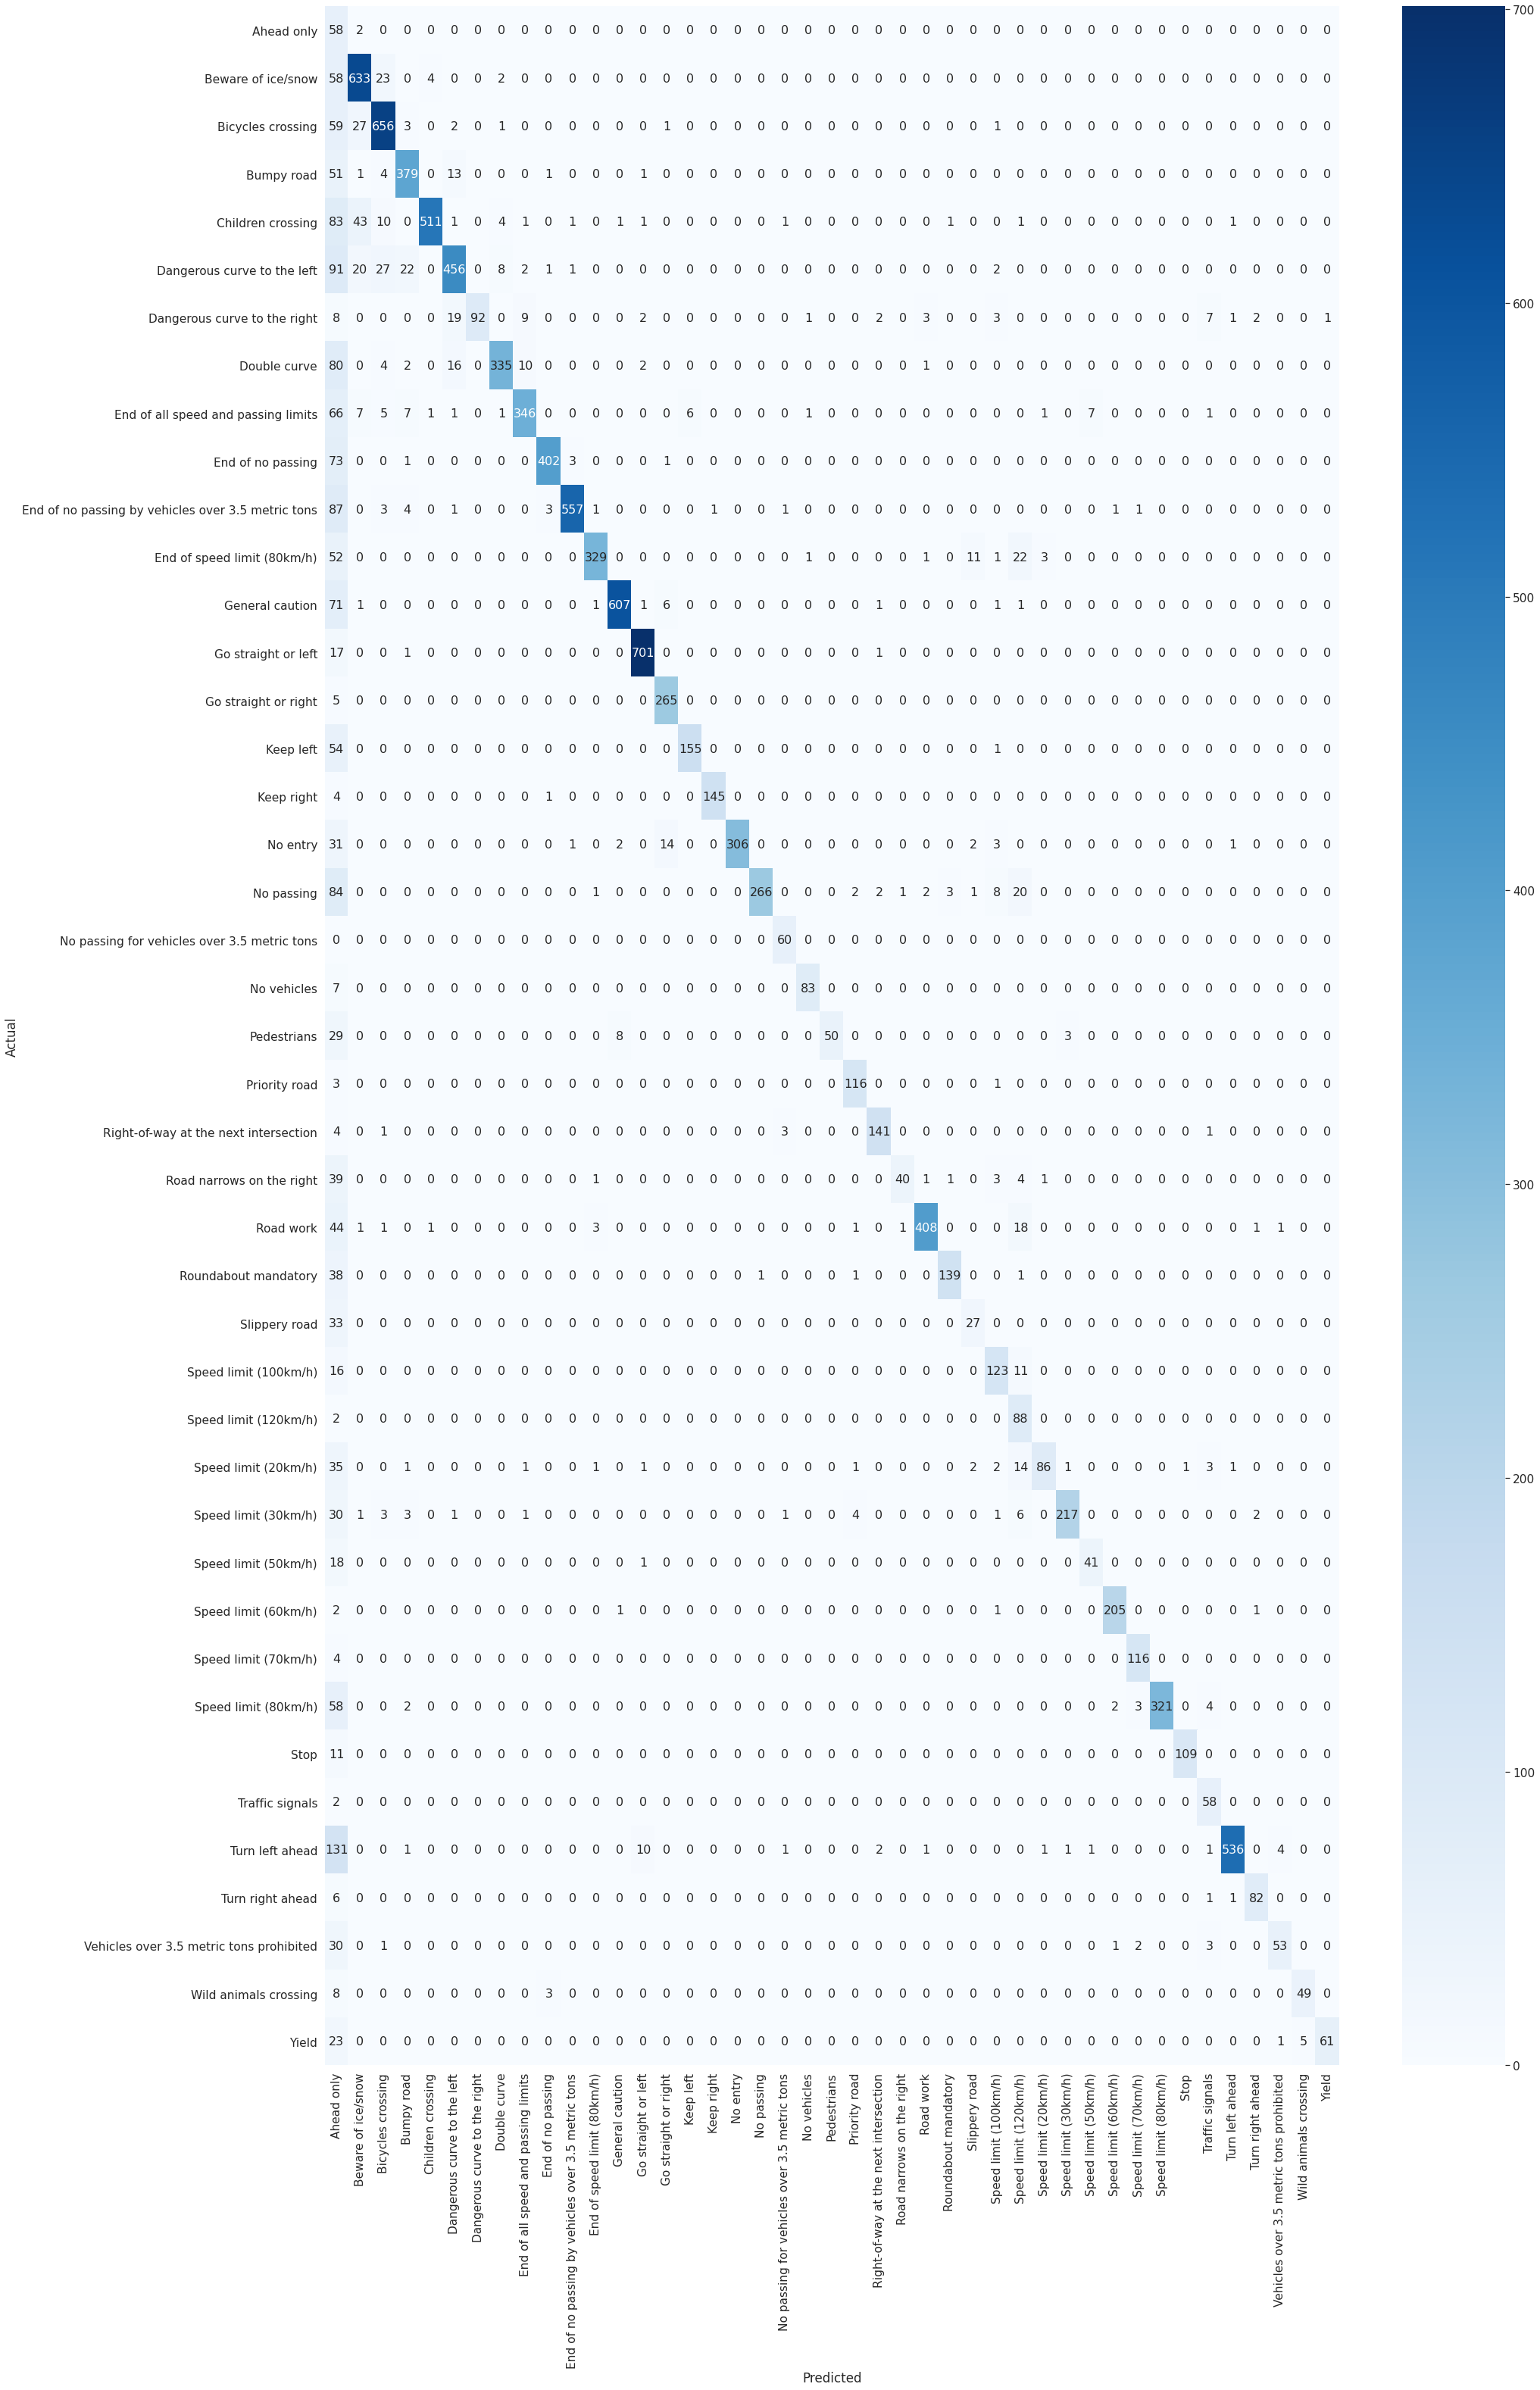

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
y_true = ClassId
y_pred = ClassId
data = confusion_matrix(testy, predicty)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (30,50))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size

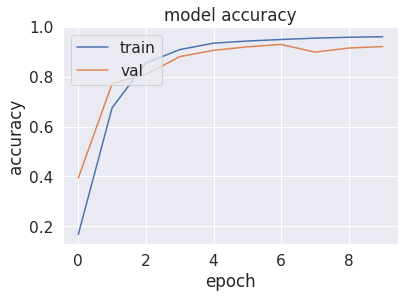

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('accuracy_history_xception')
plt.close()

In [ ]:
model.save_weights("/content/drive/MyDrive/W2_1/motevazensazi.hdf5")
model.save("/content/drive/MyDrive/W2_1/motevazensazi.hdf5")